In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

In [4]:
# MSSubClass,
# YrSold,MoSold

# convert numeric variable  to object (categorical) variable

selected_discrete_features=["MSSubClass","YrSold","MoSold"]
for i in selected_discrete_features:
    df[i] = df[i].astype('object')
    

# Missing values


In [5]:
nan_features=df.isnull().sum()[df.isnull().sum()>0].index
nan_percentage_val=df.isnull().sum()[df.isnull().sum()>0].values/len(df)
nan_percentage_val=[round(i,3)*100 for i in nan_percentage_val]
missing_data=dict(zip(nan_features,nan_percentage_val))
sorted_missing_data={k: v for k, v in sorted(missing_data.items(), key=lambda item: item[1],reverse=True)}
missing_df=pd.DataFrame(list(sorted_missing_data.items()),columns=["Features_name","Missing_percentage"])
missing_df

,Features_name,Missing_percentage
0,PoolQC,99.5
1,MiscFeature,96.3
2,Alley,93.8
3,Fence,80.8
4,FireplaceQu,47.3
5,LotFrontage,17.7
6,GarageType,5.5
7,GarageYrBlt,5.5
8,GarageFinish,5.5
9,GarageQual,5.5


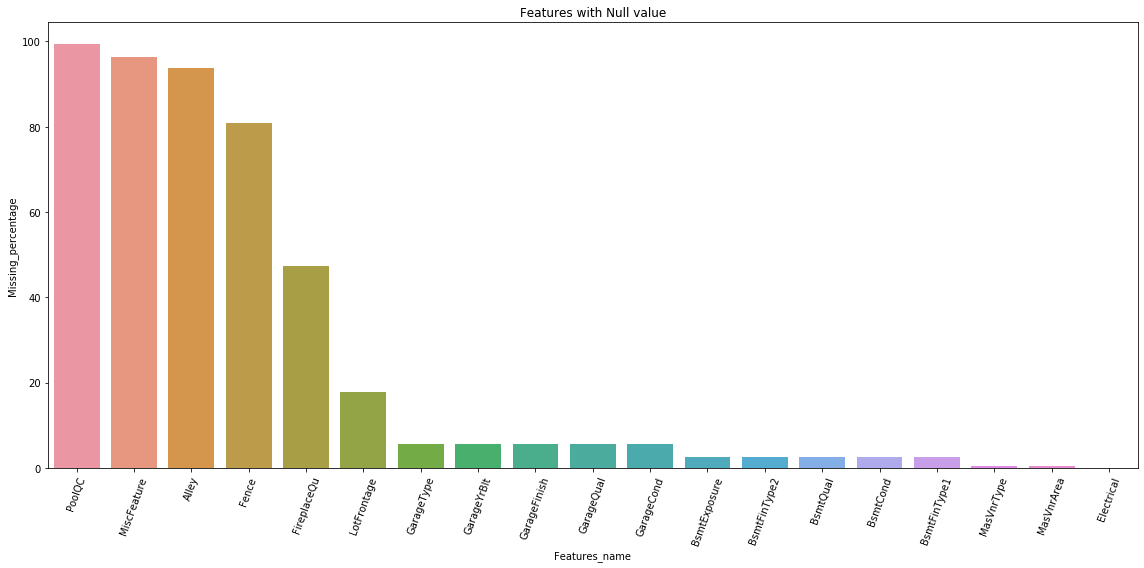

In [6]:
plt.figure(figsize=(16,8))
sns.barplot(missing_df["Features_name"],missing_df["Missing_percentage"])

plt.title("Features with Null value")
plt.xticks(rotation=70)
plt.tight_layout()

In [7]:
# features such as Alley,FireplaceQu,PoolQC,Fence,MiscFeature have more than 45% missing value
df=df.drop(["Alley","FireplaceQu","PoolQC","Fence","MiscFeature"],1)
df=df.drop("Id",1) #this is unique for all the datapoints

# Replacing missing data with 0 Since No garage = no cars in such garage.
# filling null values of columns GarageType, GarageFinish, GarageQual and GarageCond 
# None indicate there is no Garage for the house 
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(0)
df["GarageType"] = df["GarageType"].fillna("none")
df["GarageFinish"] = df["GarageFinish"].fillna("none")
df["GarageQual"] = df["GarageQual"].fillna("none")
df["GarageCond"] = df["GarageCond"].fillna("none")

# by the median LotFrontage of all the neighborhood
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))


# filling null values of columns MasVnrType
# for having no masonry veneer for these houses
# extra space outside the house
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)
df["MasVnrType"] = df["MasVnrType"].fillna("none")


# It has one NA value. Since this feature has mostly 'SBrkr', 
# so we are filling missing values with "SBrkr" using mode
df["Electrical"] = df["Electrical"].fillna(df["Electrical"].mode()[0])


# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2
# replacing missing values with none for having on basement
df["BsmtQual"] = df["BsmtQual"].fillna("none")
df["BsmtCond"] = df["BsmtCond"].fillna("none")
df["BsmtExposure"] = df["BsmtExposure"].fillna("none")
df["BsmtFinType1"] = df["BsmtFinType1"].fillna("none")
df["BsmtFinType2"] = df["BsmtFinType2"].fillna("none")


In [10]:
df.isnull().sum().any()

False

# correlation

In [11]:
num_df=df.select_dtypes(include=np.number)
num_df.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')

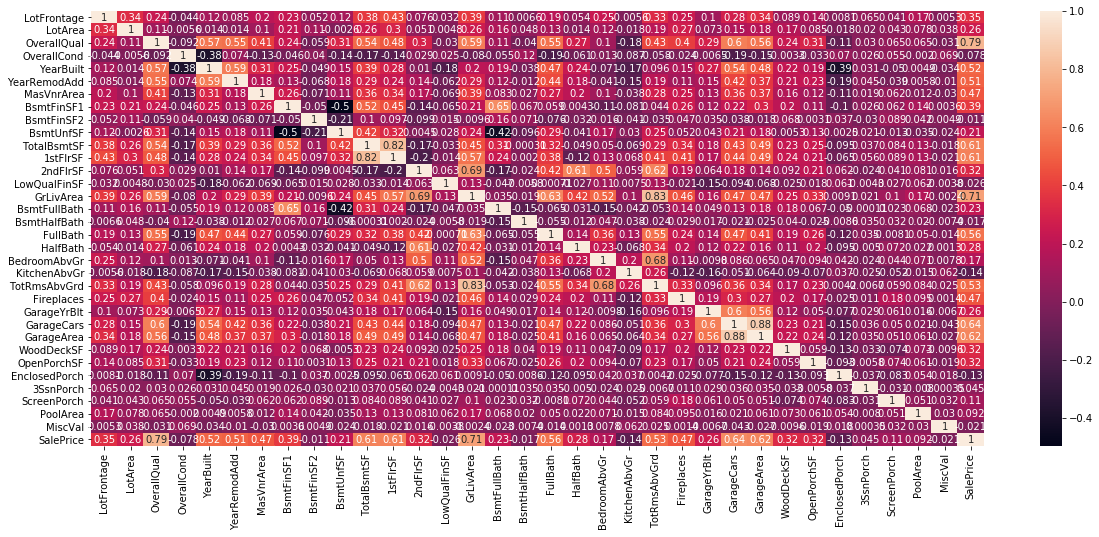

In [12]:
# correlation bwtween continuous features
# generate the correlation matrix
corr =  num_df.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr,annot=True)

In [13]:
# TotRmsAbvGrd and GrLivArea (0.83) (drop either one of them)
# GarageCars and GarageArea (0.88)
# 1stFlrSF and TtalBsmtSF (0.82)

df=df.drop(["TotRmsAbvGrd","GarageArea","1stFlrSF"],1)
df.shape

(1460, 72)

In [14]:
# Utilities,Street,Condition2,RoofMatl,Heating are the features which has very low variance
# drop this features
df=df.drop(["Utilities","Street","Condition2","RoofMatl","Heating"],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,0,0,0,0,0,12,2008,WD,Normal,250000


# outliers

In [15]:
# remove outliers w.r.t target variable

q1=df["SalePrice"].quantile(0.25)
q3=df["SalePrice"].quantile(0.75)
iqr=q3-q1
ub=q3+1.5*iqr
lb=q1-1.5*iqr
print("upper_bound:",ub)
print("lower_bound:",lb)

upper_bound: 340037.5
lower_bound: 3937.5


In [16]:
df=df[~((df["SalePrice"]<lb) | (df["SalePrice"]>ub))]
df.reset_index(drop=True,inplace=True)
df.shape

(1399, 67)

# encoding

In [23]:
# Excellent-5,Good-4,Typical/Average-3,Fair-2,Poor-1

ordinal_encode={"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"none":0}

df["ExterQual"]=df["ExterQual"].map(ordinal_encode)
df["ExterCond"]=df["ExterCond"].map(ordinal_encode)
df["BsmtQual"]=df["BsmtQual"].map(ordinal_encode)
df["BsmtCond"]=df["BsmtCond"].map(ordinal_encode)
df["HeatingQC"]=df["HeatingQC"].map(ordinal_encode)
df["KitchenQual"]=df["KitchenQual"].map(ordinal_encode)
df["GarageQual"]=df["GarageQual"].map(ordinal_encode)
df["GarageCond"]=df["GarageCond"].map(ordinal_encode)


# Good Exposure-4, Average Exposure-3, Mimimum Exposure-2, No Exposure-1, No Basement-0 
ordinal_encode_2={"Gd":4,"Av":3,"Mn":2,"No":1,"none":0}
df["BsmtExposure"]=df["BsmtExposure"].map(ordinal_encode_2)

# Good Living Quarters-6, Average Living Quarters-5, Below Average Living Quarters-4, Average Rec Room-3
# Low Quality-2, Unfinshed-1, No Basement-0
ordinal_encode_3={"GLQ":6,"ALQ":5,"BLQ":4,"Rec":3,"LwQ":2,"Unf":1,"none":0}
df["BsmtFinType1"]=df["BsmtFinType1"].map(ordinal_encode_3)
df["BsmtFinType2"]=df["BsmtFinType2"].map(ordinal_encode_3)


In [24]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [25]:
cat_df=df.select_dtypes(exclude=np.number)
cat_df.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish',
       'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [27]:
df.drop(cat_df.columns,1,inplace=True)
df.shape

(1399, 42)

In [28]:
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,4,3,4,...,3,3,0,61,0,0,0,0,0,208500
1,80.0,9600,6,8,1976,1976,0.0,3,3,4,...,3,3,298,0,0,0,0,0,0,181500
2,68.0,11250,7,5,2001,2002,162.0,4,3,4,...,3,3,0,42,0,0,0,0,0,223500
3,60.0,9550,7,5,1915,1970,0.0,3,3,3,...,3,3,0,35,272,0,0,0,0,140000
4,84.0,14260,8,5,2000,2000,350.0,4,3,4,...,3,3,192,84,0,0,0,0,0,250000


In [29]:
X=df.drop("SalePrice",1)
y=df["SalePrice"]
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

[0.01349903 0.01830768 0.18024605 0.00964335 0.03045807 0.02299304
 0.00569109 0.14063867 0.00339292 0.02901002 0.00218394 0.00758062
 0.00876245 0.02114297 0.00153975 0.0021242  0.00532362 0.03460164
 0.00867283 0.01396677 0.00067248 0.10972678 0.01009955 0.00208135
 0.05894608 0.00689568 0.00950057 0.00340639 0.10779077 0.04242924
 0.00597252 0.05571377 0.00310926 0.00423041 0.00566574 0.00613494
 0.0031286  0.00082345 0.00260611 0.0007159  0.0005717 ]


In [38]:
s=pd.Series(index=X.columns,data=model.feature_importances_)
s.sort_values(ascending=False)

OverallQual      0.180246
ExterQual        0.140639
GrLivArea        0.109727
KitchenQual      0.107791
FullBath         0.058946
GarageCars       0.055714
Fireplaces       0.042429
TotalBsmtSF      0.034602
YearBuilt        0.030458
BsmtQual         0.029010
YearRemodAdd     0.022993
BsmtFinSF1       0.021143
LotArea          0.018308
2ndFlrSF         0.013967
LotFrontage      0.013499
BsmtFullBath     0.010100
OverallCond      0.009643
BedroomAbvGr     0.009501
BsmtFinType1     0.008762
HeatingQC        0.008673
BsmtExposure     0.007581
HalfBath         0.006896
OpenPorchSF      0.006135
GarageYrBlt      0.005973
MasVnrArea       0.005691
WoodDeckSF       0.005666
BsmtUnfSF        0.005324
GarageCond       0.004230
KitchenAbvGr     0.003406
ExterCond        0.003393
EnclosedPorch    0.003129
GarageQual       0.003109
ScreenPorch      0.002606
BsmtCond         0.002184
BsmtFinSF2       0.002124
BsmtHalfBath     0.002081
BsmtFinType2     0.001540
3SsnPorch        0.000823
PoolArea    

In [48]:
df_final=df[["OverallQual","GrLivArea","KitchenQual","GarageCars","Fireplaces","YearBuilt"]]
df_final.head()

,OverallQual,GrLivArea,KitchenQual,GarageCars,Fireplaces,YearBuilt
0,7,1710,4,2,0,2003
1,6,1262,3,2,1,1976
2,7,1786,4,2,1,2001
3,7,1717,4,3,1,1915
4,8,2198,4,3,1,2000


In [49]:
import statsmodels
import statsmodels.api as sm
# build a full model using OLS()
# consider the transform_saleprice
X_train_withconstant=sm.add_constant(df_final)
linreg = sm.OLS(y,X_train_withconstant).fit()

# print the summary output
print(linreg.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     841.5
Date:                Wed, 23 Sep 2020   Prob (F-statistic):               0.00
Time:                        08:06:23   Log-Likelihood:                -16287.
No. Observations:                1399   AIC:                         3.259e+04
Df Residuals:                    1392   BIC:                         3.262e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.257e+05   6.24e+04    -11.628      

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   44.7s finished


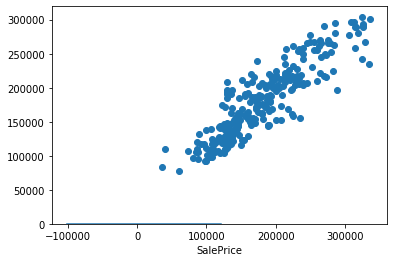

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_final, y, test_size=0.2, random_state=0)
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 10, verbose=2, random_state=0, n_jobs = -1)
rf_random.fit(X_train,y_train)
rf_random.best_params_
rf_random.best_score_
y_pred=rf_random.predict(X_test)
sns.distplot(y_test-y_pred)
plt.scatter(y_test,y_pred)

In [51]:
import pickle
# open a file, where you ant to store the data
file = open('rf_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)